# Chap 11

# 특수기저 - Special Basis

## 11.3 웨이브릿(Wavelets)

In [1]:
def wavelet(v):
    if len(v) is 1:
        print('v_{n} = {vec}'.format(n=len(v), vec=v))
        return
    vnew = [(v[2*i] + v[2*i+1])/2 for i in range(len(v)//2)]
    w = [v[2*i] - v[2*i+1] for i in range(len(v)//2)]
    
#     print('v_{n} = {vec}'.format(n=len(vnew), vec=vnew))
    print('w_{n} = {vec}'.format(n=len(w), vec=w))
    return wavelet(vnew)

In [2]:
v = [4, 5, 3, 7, 4, 5, 9, 7, 2, 3, 3, 5, 0, 0, 0, 0]

wavelet(v)

w_8 = [-1, -4, -1, 2, -1, -2, 0, 0]
w_4 = [-0.5, -3.5, -1.5, 0.0]
w_2 = [-1.5, 3.25]
w_1 = [3.875]
v_1 = [3.5625]


In [3]:
def wavelet(v):
    '''Normalization: 정규직교벡터의 좌표표현으로 만들어 주기'''
    if len(v) is 1:
        print('v_{n} = {vec}'.format(n=len(v), vec=v))
        return
    vnew = [round((len(v)/(len(v)//2))**(1/2)*((v[2*i] + v[2*i+1])/2),2) for i in range(len(v)//2)]
    w = [round(v[2*i] - v[2*i+1], 2) for i in range(len(v)//2)]
    
#     print('v_{n} = {vec}'.format(n=len(vnew), vec=vnew))
    print('w_{n} = {vec}'.format(n=len(w), vec=w))
    return wavelet(vnew)

In [4]:
v = [4, 5, 3, 7, 4, 5, 9, 7, 2, 3, 3, 5, 0, 0, 0, 0]

wavelet(v)

w_8 = [-1, -4, -1, 2, -1, -2, 0, 0]
w_4 = [-0.71, -4.95, -2.12, 0.0]
w_2 = [-2.99, 6.51]
w_1 = [10.95]
v_1 = [14.25]


### PyWavelets 모듈을 이용한 Wavelet Transform 실습

In [82]:
# !pip install PyWavelets

In [84]:
%matplotlib inline
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt

In [109]:
# Load an color image in grayscale
img = cv2.imread('./images/lena_grey.bmp', 0)
cA, cD = pywt.dwt(img, 'db1')

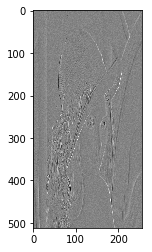

In [110]:
plt.imshow(cD, cmap='gray')

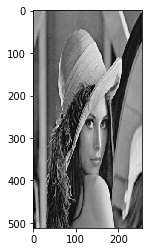

In [111]:
plt.imshow(cA, cmap='gray')

## 11.5 푸리에 변환 - Fourier Transform

`numpy` 모듈의 [`numpy.fft()`](https://docs.scipy.org/doc/numpy/reference/routines.fft.html) 및 OpenCV의 [`cv2.dft()`](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html#fourier-transform)를 이용해서 푸리에 변환을 적용해본다.

자세한 내용은 [여기](http://darkpgmr.tistory.com/171)를 참고하면 된다.

### 1) 푸리에 변환

In [56]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

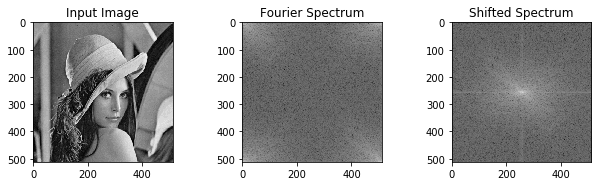

In [66]:
# Load an color image in grayscale
img = cv2.imread('./images/lena_grey.bmp', 0)
f = np.fft.fft2(img)  # 푸리에 변환 적용
fshift = np.fft.fftshift(f)
f_spectrum = np.log(np.abs(f))
magnitude_spectrum = np.log(np.abs(fshift))

fig, axs = plt.subplots(1, 3, figsize=(10, 5))
fig.subplots_adjust(hspace=.5, wspace=.5)

images = [img, f_spectrum, magnitude_spectrum]
titles = ['Input Image', 'Fourier Spectrum', 'Shifted Spectrum']

for i, (img, title) in enumerate(zip(images, titles)):
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(title)

### 2) 푸리에 역변환

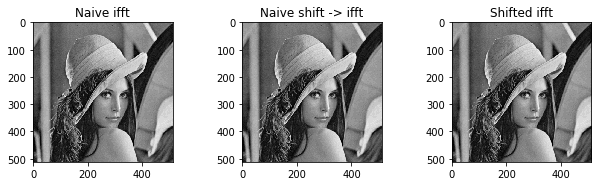

In [80]:
# 단순 푸리에 변환 후 역변환
ifft = np.fft.ifft2(f)
ifft_img = np.abs(ifft)

# shifted 된 푸리에 변환의 역변환
shifft = np.fft.ifft2(fshift)
shifft_img = np.abs(shifft)

# shifted 된 값을 ifftshift 후 역변환
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

fig, axs = plt.subplots(1, 3, figsize=(10, 5))
fig.subplots_adjust(hspace=.5, wspace=.5)

images = [ifft_img, shifft_img, img_back]
titles = ['Naive ifft', 'Naive shift -> ifft', 'Shifted ifft']

for i, (img, title) in enumerate(zip(images, titles)):
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(title)